# Materials and code to create images of the LORA paper's annex (leishmania case)

In [1]:
%matplotlib inline
from pylab import *

In [2]:
rcParams['figure.figsize'] = (8,8)

In [3]:
import pandas as pd
import glob
from tqdm import tqdm
from sequana import *
from sequana.pacbio import PacbioSubreads

In [6]:
import importlib
import utils  # your module
importlib.reload(utils)

<module 'utils' from '/home/cokelaer/Work/1_Projects/LORA/paper_LORA/utils.py'>

# Data download

In [7]:
utils.download_leishmania_data()


🚀 Running: fastq-dump --gzip -O data/leishmania SRR13558805


5.52GB [1:14:15, 1.24MB/s]                                                                                                                                                                                                                    

Read 770984 spots for SRR13558805
Written 770984 spots for SRR13558805


5.52GB [1:14:20, 1.24MB/s]

✅ Download complete: data/leishmania/SRR13558805.fastq.gz


# Stastistics for Table 




In [8]:
f = FastA("GoldStandard/Lmundinia.fa")
L = f.get_stats()['total_length']
GC = f.GC_content()
print(L, round(GC,1))

35896781 59.5


# BUSCO meta analysis

In [14]:
bf = utils.BUSCOFactory()
assert len(bf.busco_df) >0, len(bf.busco_df)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 252.97it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


💾 Saved paper_images/leishmania/busco_leishmania.eps in pdf/eps/png


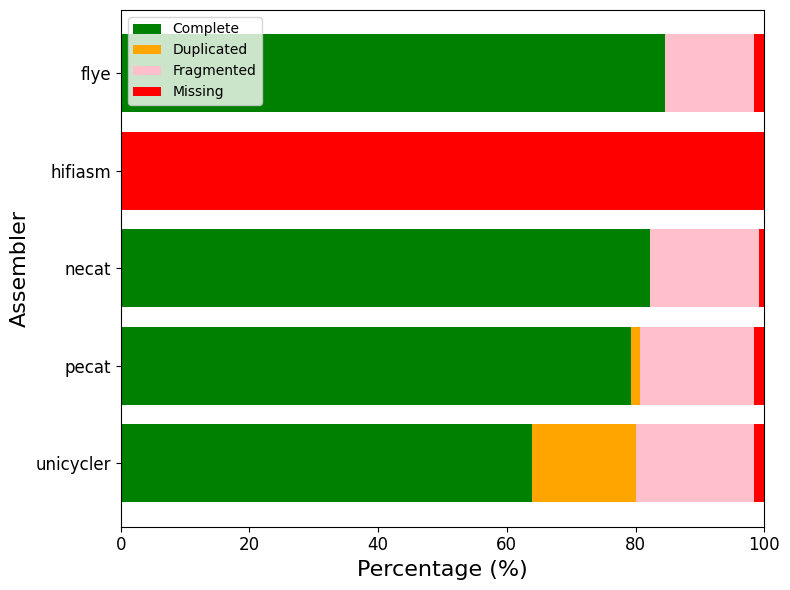

In [15]:
bf.plot_busco_summary_bar("leishmania")
utils.saveall("paper_images/leishmania/busco_leishmania")


# Checkm meta analysis

Creating and saving file. You need FASTA files from final analysis. Not provided here but on Zenodo DOI in the github.com/cokelaer/paper_LORA.
💾 Saved paper_images/leishmania/leishmania_contigs_summary.eps in pdf/eps/png


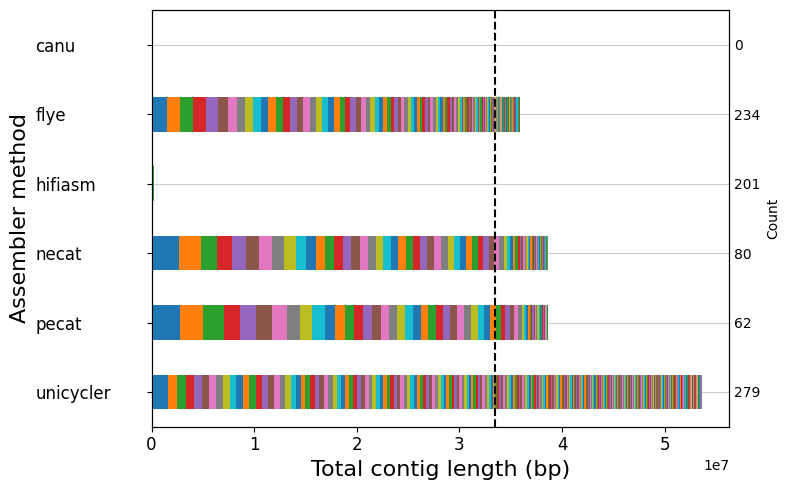

In [11]:
pl = utils.PlotContigs("leishmania")
pl.plot_assembly_results()
utils.saveall("paper_images/leishmania/leishmania_contigs_summary")